## About Dataset
The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

In [53]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [54]:
df=pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Input Variables


1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)




## Predict Variables
y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”) (A term deposit is a type of deposit account held at a financial institution where money is locked up for some set period of time. )

In [55]:
# Checking whether any column contains null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

The Education column has many categories, we can possibly reduce some of them to have a better modelling.Let's see the categories of that column.

In [56]:
df.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We can reduce the number of categories by adding 'basic.4y','basic.6y' and 'basic.9y' under a single category that is 'Basic'.

In [57]:
# Merging all basic category together
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [58]:
# After grouping
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# Data Exploration


In [59]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

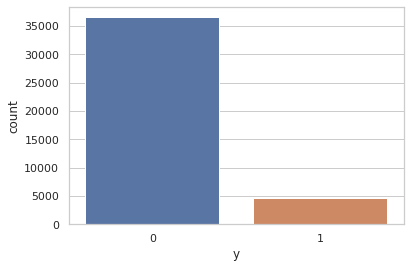

In [60]:
sns.countplot(x='y',data=df)
plt.savefig('count_plot')

In [61]:
y_yes=len(df[df['y']==1])
y_no=len(df[df['y']==0])
print("The percantage of no_subscription is ",100*(y_no/(y_yes+y_no)))
print("The percantage of subscription is ",100*(y_yes/(y_yes+y_no)))


The percantage of no_subscription is  88.73458288821988
The percantage of subscription is  11.265417111780131


Here we can see that the percentage of no_subscription is 88.73 (approx) and the percentage of subscription is 11.26 (approx). So our classes are imbalanced.

Note: An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. 
Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.

Let's do some more exploration.

In [62]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Here we can observe that the customer who have bought the term deposit
* Average age was lower for 
* Average call duration was higher
* The average campaign was lower

Again we can observe other categorical variables like education,job,maritial status to get more detailes information of our data.


In [63]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


Here we can observe that
* Students have the most average term deposit subscription followed by 'retired'


In [64]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


Here we observe that more or categories under marital don't have any influence on the subcription of the term deposit

In [65]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


Here we can observe that 'illiterate' people tend to buy a term deposit more than other education background.

# Visualizations

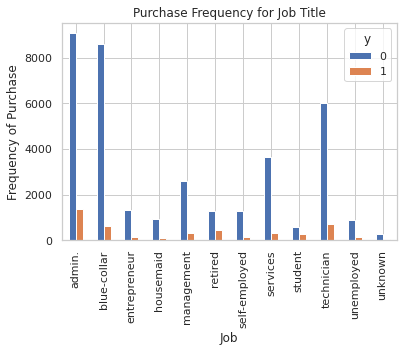

In [66]:
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

Here we see that the frequency of purchase of the deposit depends a great deal on the job title. So job title can be a good predictor of the outcome variable.

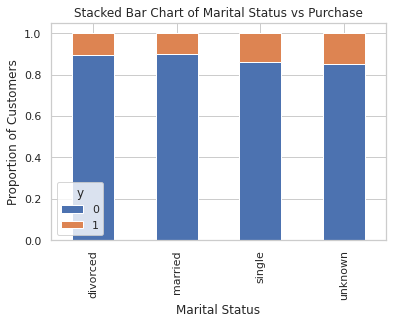

In [67]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Here we can say that the maritial status isn't a strong predictor of the outcome variable.

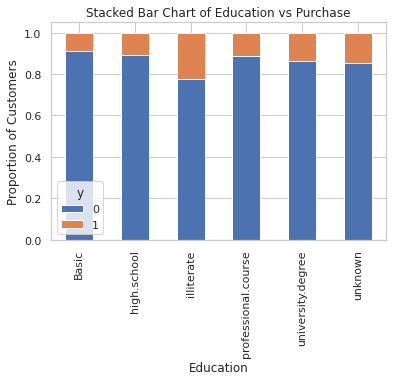

In [68]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education might be a good predictor of the outcome.

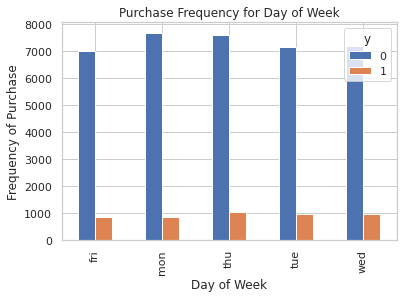

In [69]:
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week isn't a good predictor of the outcome variable.

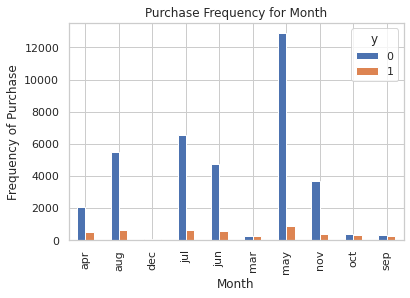

In [70]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable.

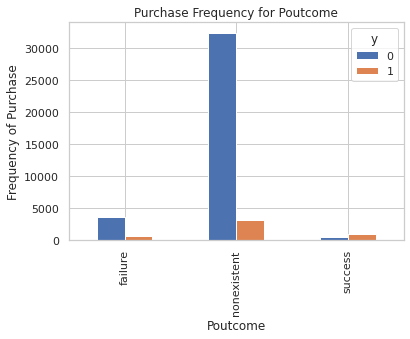

In [71]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome might be a good predictor for the outcome variable.

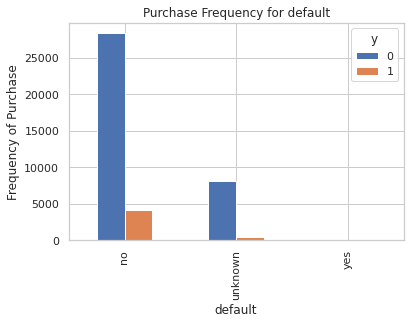

In [72]:
pd.crosstab(df.default,df.y).plot(kind='bar')
plt.title('Purchase Frequency for default')
plt.xlabel('default')
plt.ylabel('Frequency of Purchase')
plt.savefig('default_bar')

Default might be a good predictor for the target variable

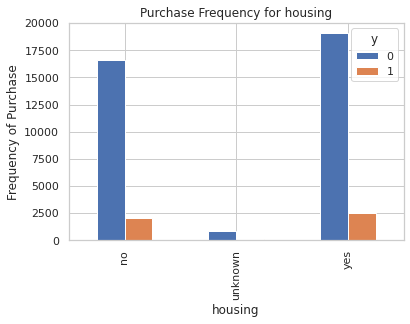

In [73]:
pd.crosstab(df.housing,df.y).plot(kind='bar')
plt.title('Purchase Frequency for housing')
plt.xlabel('housing')
plt.ylabel('Frequency of Purchase')
plt.savefig('housing_bar')

Housing maybe a moderate predictor for the target variable

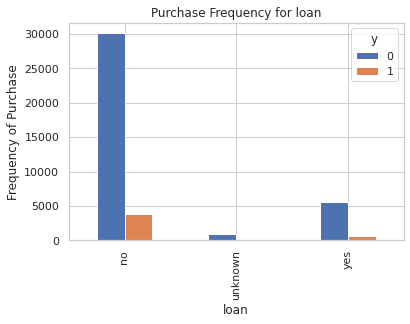

In [74]:
pd.crosstab(df.loan,df.y).plot(kind='bar')
plt.title('Purchase Frequency for loan')
plt.xlabel('loan')
plt.ylabel('Frequency of Purchase')
plt.savefig('loan_bar')

Loan is a strong predictor for the target variable

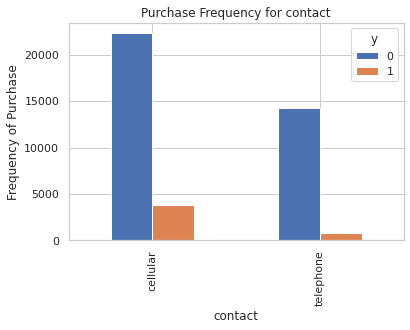

In [75]:
pd.crosstab(df.contact,df.y).plot(kind='bar')
plt.title('Purchase Frequency for contact')
plt.xlabel('contact')
plt.ylabel('Frequency of Purchase')
plt.savefig('contact_bar')

Therefore contact is also a strong predictor for the target variable

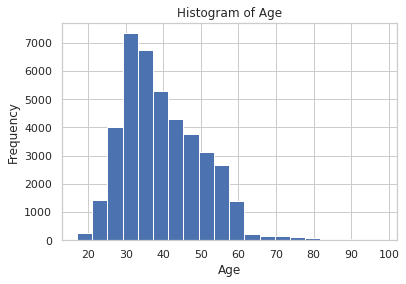

In [76]:
df.age.hist(bins=20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Here we can say that maximum bank customers are within 30-40 age group

In [77]:
# Hence dropping some of the categorical values
cols_to_drop=['marital','day_of_week']
df.drop(columns=cols_to_drop,axis=1,inplace=True)

# Create Dummy variables

In [78]:
cat_vars=['job','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars] #creating a list where only the dummies of categorical values exist not the actual variable

In [79]:
# Data to keep
data_final=df[to_keep]
data_final.columns.values
data_final

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


# Oversampling Using SMOTE

As our training data is created we will up-sample or Oversample the 'subscription' or the 1's
 in the 'y' class by creating synthetic samples of the minority class(not a copy but a new observation created by knn technique) using SMOTE(Synthetic Minority Oversampling Technique)

In [80]:
# Separating the dataset into X,Y
X = data_final.loc[:, data_final.columns != 'y']
y = data_final['y']

# Implementing Smote
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('before using SMOTE--------------')
print('X_train:',X_train.shape)
print('proportion of subscription:{:.2f}'.format(len(y_train[y_train==1])/len(y_train)))
print('proportion of no-subscription:{:.2f}'.format(len(y_train[y_train==0])/len(y_train)))
os_data_X,os_data_y=os.fit_resample(X_train,y_train) # Re-sampling the training data using SMOTE
print('after using SMOTE--------------')
print('os_data_X:',os_data_X.shape)
print('proportion of subscription:{:.2f}'.format(len(os_data_y[os_data_y==1])/len(os_data_y)))
print('proportion of no-subscription:{:.2f}'.format(len(os_data_y[os_data_y==0])/len(os_data_y)))

before using SMOTE--------------
X_train: (28831, 52)
proportion of subscription:0.11
proportion of no-subscription:0.89
after using SMOTE--------------
os_data_X: (51134, 52)
proportion of subscription:0.50
proportion of no-subscription:0.50


# Recursive Feature Elimnination

Recursive Feature eliminiation in short RFE is a feature selection algorithm.
* It works by searching a subset of features in the training data set and successfully removing features until the desired number remains.
* This is achieved by fitting the given machine learnong algorithm used in the core of the model, ranking features by importance,discarding the least important features and re-fitting the model.This process is repeated until a specified desired number remains.

In [81]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# As we have binary output we are selecting logistic regression as our linear model

logreg = LogisticRegression(solver='liblinear',n_jobs=1)
rfe = RFE(estimator=logreg,n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
  True  True  True False  True  True False  True  True  True  True  True
 False  True  True  True False False False  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False]
[32 31 28 33 27 22 25 30 26 29  2  1  1  1  1  3  1  1  4  1  1  1  1  1
  9  1  1  1  6  5 23  1  1  1  1  1  1 21 20 15 13 16 12 14 19 10 11 17
 18  8  7 24]


In [82]:
l=rfe.support_.tolist()
_=os_data_X.columns.values.tolist()
cols_to_select=[]
for i in range(51):
  if l[i]==True:
    cols_to_select.append(_[i])

print(cols_to_select)

['job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_self-employed', 'job_services', 'job_technician', 'job_unemployed', 'job_unknown', 'education_Basic', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes']


In [83]:
# Now we put the selected features
X=os_data_X[cols_to_select]
y=os_data_y

# Implementing the model

In [84]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.495009
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51115
Method:                           MLE   Df Model:                           18
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                  0.2859
Time:                        10:26:39   Log-Likelihood:                -25312.
converged:                       True   LL-Null:                       -35443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
job_blue-collar                  -1.6818      0.044    -38.511      0.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [85]:
# We drop the columns which have nan or p-value>0.95
# Hence we drop 'housing_unknown' and 'loan_unknown'
X.drop(columns=['housing_unknown','loan_unknown'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [86]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.495249
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51116
Method:                           MLE   Df Model:                           17
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                  0.2855
Time:                        10:26:40   Log-Likelihood:                -25324.
converged:                       True   LL-Null:                       -35443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
job_blue-collar                  -1.6780      0.044    -38.414      0.

In [87]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(n_jobs=1, solver='liblinear')

## Predicting test results and accuracy

In [88]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


## Confusion Matrix

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7492  174]
 [1778 5897]]


## Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The support is the number of occurrences of each class in y_test.

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      7666
           1       0.97      0.77      0.86      7675

    accuracy                           0.87     15341
   macro avg       0.89      0.87      0.87     15341
weighted avg       0.89      0.87      0.87     15341



Interpretation: Of the entire test set, 87% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 87% of the customer’s preferred term deposits that were promoted.

## ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

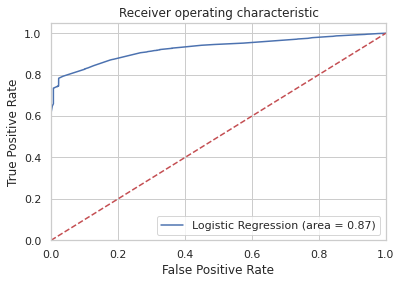

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'% logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()